In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
# read dataset
import pandas as pd
df = pd.read_csv("temps.csv")

# Read in data and display first 5 rows
print(df.head())

# Print the shape of the features
print("Shape of the dataset:", df.shape)

# Descriptive statistics for each column
print("\nDescriptive statistics for each column:")
print(df.describe())



   year  month  day  week  temp_2  temp_1  average  actual  forecast_noaa  \
0  2016      1    1   Fri      45      45     45.6      45             43   
1  2016      1    2   Sat      44      45     45.7      44             41   
2  2016      1    3   Sun      45      44     45.8      41             43   
3  2016      1    4   Mon      44      41     45.9      40             44   
4  2016      1    5  Tues      41      40     46.0      44             46   

   forecast_acc  forecast_under  friend  
0            50              44      29  
1            50              44      61  
2            46              47      56  
3            48              46      53  
4            46              46      41  
Shape of the dataset: (348, 12)

Descriptive statistics for each column:
         year       month         day      temp_2      temp_1     average  \
count   348.0  348.000000  348.000000  348.000000  348.000000  348.000000   
mean   2016.0    6.477011   15.514368   62.652299   62.701

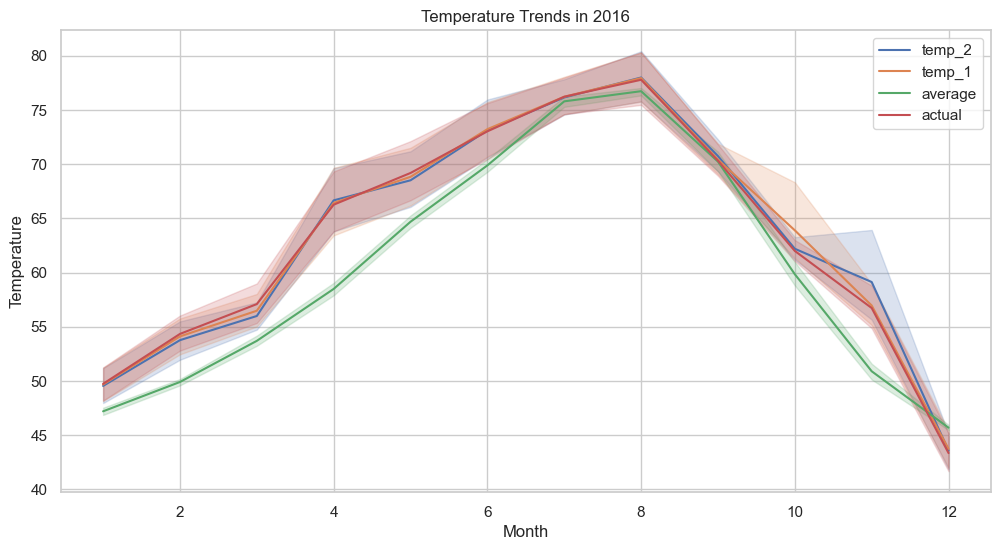

In [2]:
# visualize the graphs between temperature and year 2016 for each month in python

import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for the year 2016
df_2016 = df[df['year'] == 2016]

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a line plot for each temperature column
plt.figure(figsize=(12, 6))
for column in ['temp_2', 'temp_1', 'average', 'actual']:
    sns.lineplot(x='month', y=column, data=df_2016, label=column)

plt.title('Temperature Trends in 2016')
plt.xlabel('Month')
plt.ylabel('Temperature')
plt.legend()
plt.show()


In [3]:
# One-hot encode the categorical data
df_encoded = pd.get_dummies(df)

# Display the first 5 rows of the last 12 columns
df_encoded.iloc[:, -12:].head()

,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,45,43,50,44,29,1,0,0,0,0,0,0
1,44,41,50,44,61,0,0,1,0,0,0,0
2,41,43,46,47,56,0,0,0,1,0,0,0
3,40,44,48,46,53,0,1,0,0,0,0,0
4,44,46,46,46,41,0,0,0,0,0,1,0


In [4]:
import numpy as np

# Assuming 'actual' is the column you want to predict
labels = df['actual']

# Remove the labels from the features
# axis 1 refers to the columns
features = df.drop('actual', axis=1)

# Saving feature names for later use
feature_names = features.columns

# Convert to NumPy arrays
labels_array = np.array(labels)
features_array = np.array(features)

# Now you have labels_array containing the values to predict and features_array containing the feature values.

# Displaying the shapes of the arrays
print("Labels array shape:", labels_array.shape)
print("Features array shape:", features_array.shape)


Labels array shape: (348,)
Features array shape: (348, 11)


In [5]:
# Assuming 'week' is a categorical column
df_encoded = pd.get_dummies(df, columns=['week'])
print(df_encoded.shape)
# Split the data into features and labels
labels_array = df_encoded['actual']
features_array= df_encoded.drop(['actual'], axis=1)

from sklearn.model_selection import train_test_split

# Assuming you have labels_array and features_array from the previous code

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_array, labels_array, test_size=0.2, random_state=42)

# Check the shape of X_train and X_test
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print(df.shape)

(348, 18)
Shape of X_train: (278, 17)
Shape of X_test: (70, 17)
(348, 12)


In [6]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (278, 17)
Training Labels Shape: (278,)
Testing Features Shape: (70, 17)
Testing Labels Shape: (70,)


In [7]:
# Baseline predictions are the historical averages
baseline_predictions = df['average']

# Calculate baseline errors
baseline_errors = baseline_predictions - labels_array

# Display average baseline error
average_baseline_error = np.mean(np.abs(baseline_errors))
print('Average Baseline Error:', average_baseline_error)


Average Baseline Error: 4.933045977011494


In [8]:
# Import the model
from sklearn.ensemble import RandomForestRegressor

# Instantiate and train the RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=1000, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
predictions = rf_model.predict(X_test)

In [9]:
from sklearn.metrics import mean_absolute_error

# Use the forest's predict method on the test data
predictions = rf_model.predict(X_test)

# Calculate the absolute errors
absolute_errors = np.abs(predictions - y_test)

# Print out the mean absolute error (MAE)
mae = mean_absolute_error(y_test, predictions)
print('Mean Absolute Error:', mae)


Mean Absolute Error: 3.8864285714285725


In [10]:
# Calculate mean absolute percentage error (MAPE)
mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100

# Display accuracy
accuracy = 100 - mape
print('Mean Absolute Percentage Error (MAPE):', mape)
print('Accuracy:', accuracy, '%')


Mean Absolute Percentage Error (MAPE): 6.153150674958004
Accuracy: 93.846849325042 %


In [11]:
# !pip install pydot

In [12]:
# !pip install pydot-ng 

Defaulting to user installation because normal site-packages is not writeable


In [11]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [18]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# # Pull out one tree from the forest
# tree = rf.estimators_[5]
# # Import tools needed for visualization
# from sklearn.tree import export_graphviz
# import pydot
# # Pull out one tree from the forest
# tree = rf.estimators_[5]
# # Export the image to a dot file
# export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
# # Use dot file to create a graph
# (graph, ) = pydot.graph_from_dot_file('tree.dot')
# # Write graph to a png file
# graph.write_png('tree.png')


# Assuming you have trained your RandomForestRegressor as rf_model
# and you have features_array and df as your DataFrame
rf_tree = rf_model.estimators_[5]  # Extracting one tree from the forest

# Export the image to a dot file
export_graphviz(rf_tree, out_file='tree.dot', feature_names=X_train.columns, rounded=True, precision=1)

# Use the dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')

# # Write the graph to a png file
# graph.write_png('tree.png')

# Print the feature importances of the tree
print("Feature importances:", rf_tree.feature_importances_)

Feature importances: [0.         0.00140824 0.02235881 0.02741385 0.84107486 0.03060271
 0.01147085 0.00651243 0.00436031 0.02585869 0.00427692 0.0043058
 0.00176063 0.00564505 0.00499199 0.00684485 0.00111401]


In [13]:
# Assuming you have trained your RandomForestRegressor as rf_model
importances = list(rf_model.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(df.columns, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)

# Print out the feature and importances
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]


Variable: temp_2               Importance: 0.67
Variable: temp_1               Importance: 0.15
Variable: actual               Importance: 0.05
Variable: average              Importance: 0.03
Variable: day                  Importance: 0.02
Variable: week                 Importance: 0.02
Variable: forecast_noaa        Importance: 0.02
Variable: forecast_acc         Importance: 0.02
Variable: month                Importance: 0.01
Variable: year                 Importance: 0.0
Variable: forecast_under       Importance: 0.0
Variable: friend               Importance: 0.0


[None, None, None, None, None, None, None, None, None, None, None, None]